In [18]:
import pandas as pd
import os
import glob


# 文件夹路径
folder_path = "/Users/jackli/Desktop/python/transformer/processed_data"

# 获取该文件夹下所有 csv 文件路径
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 读取所有 csv 并存入列表
dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    i=i+1

    dfs.append(df)

# 按列名合并，自动对齐不同文件的列
merged_df = pd.concat(dfs, ignore_index=True, sort=False)

print(merged_df.head())


   62303129  62303130  62303305  62303310  62303320  62303350  62322479  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       7.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       4.5   

   62322480  62322481  62322482  ...  62323120  62323150  62323151  62323160  \
0       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
2       0.0       0.0       0.0  ...       0.0       0.0       1.5       0.0   
3       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0  ...       0.0       0.0       0.0       0.0   

   62323170  62323190  62323261  623R0150  623R1550        flow  
0 

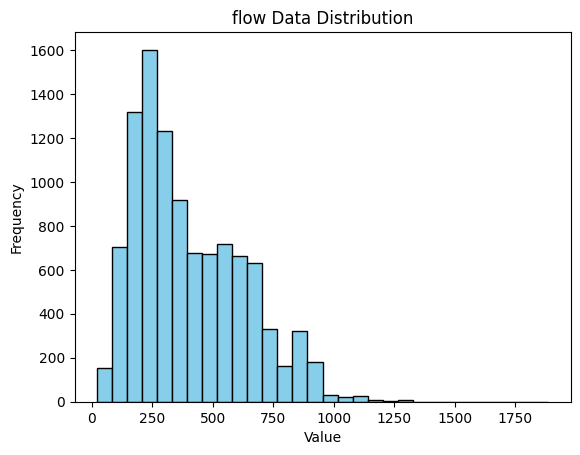

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据
data = merged_df['flow']

# 绘制直方图
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("flow Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


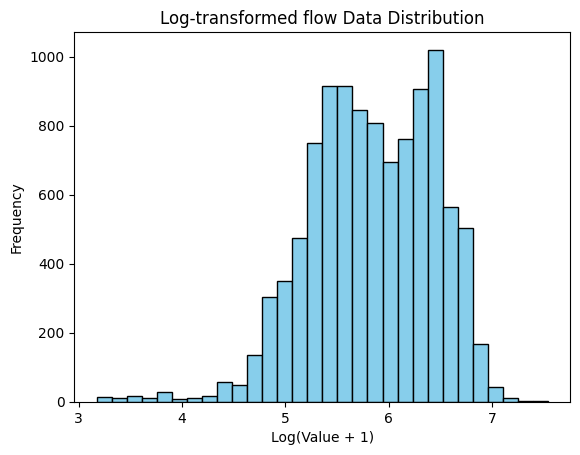

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = merged_df['flow']

# 处理0或负值（这里加1）
data_log = np.log(data + 1)  # 加1避免log(0)

# 绘制对数变换后的直方图
plt.hist(data_log, bins=30, color='skyblue', edgecolor='black')
plt.title("Log-transformed flow Data Distribution")
plt.xlabel("Log(Value + 1)")
plt.ylabel("Frequency")
plt.show()


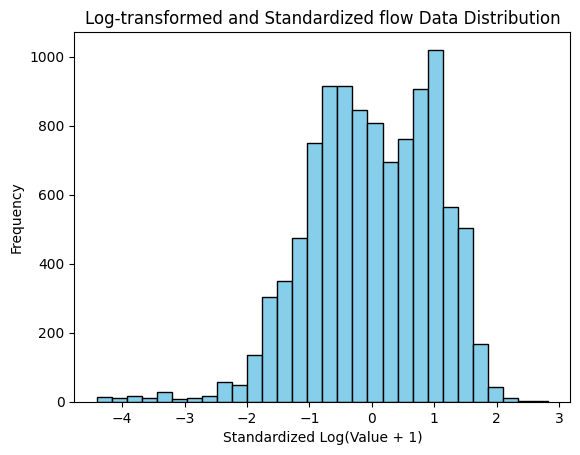

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = merged_df['flow']

# 对数变换（处理0值）
data_log = np.log1p(data)  # np.log(data + 1)

# 手动标准化
mean = np.mean(data_log)
std = np.std(data_log)
data_log_scaled = (data_log - mean) / std

# 绘制直方图
plt.hist(data_log_scaled, bins=30, color='skyblue', edgecolor='black')
plt.title("Log-transformed and Standardized flow Data Distribution")
plt.xlabel("Standardized Log(Value + 1)")
plt.ylabel("Frequency")
plt.show()


In [22]:
merged_df.iloc[:,:-1]

,62303129,62303130,62303305,62303310,62303320,62303350,62322479,62322480,62322481,62322482,...,62323110,62323120,62323150,62323151,62323160,62323170,62323190,62323261,623R0150,623R1550
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


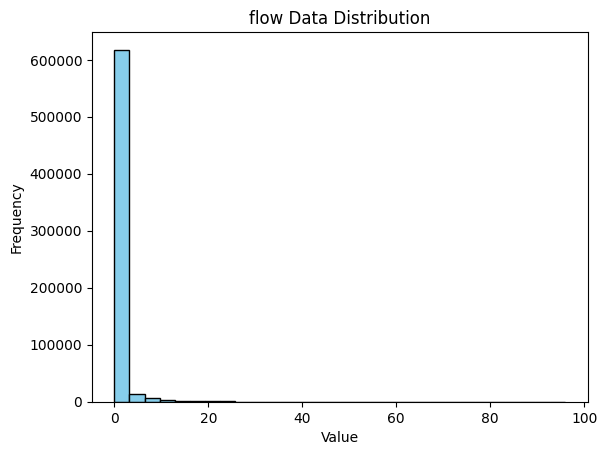

In [ ]:

data = merged_df.iloc[:, :-1].to_numpy().flatten()

# 绘制直方图
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title("Rainfall Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


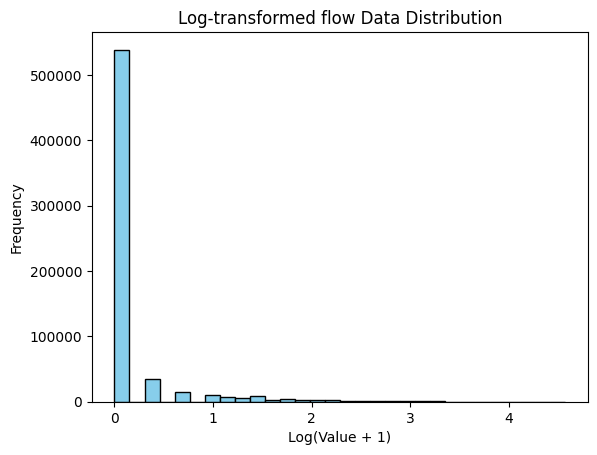

In [31]:
data = merged_df.iloc[:, :-1].to_numpy().flatten()
# 对数变换（处理0值）
# 处理0或负值（这里加1）
data_log = np.log(data + 1)  # 加1避免log(0)

# 绘制对数变换后的直方图
plt.hist(data_log, bins=30, color='skyblue', edgecolor='black')
plt.title("Log-transformed flow Data Distribution")
plt.xlabel("Log(Value + 1)")
plt.ylabel("Frequency")
plt.show()

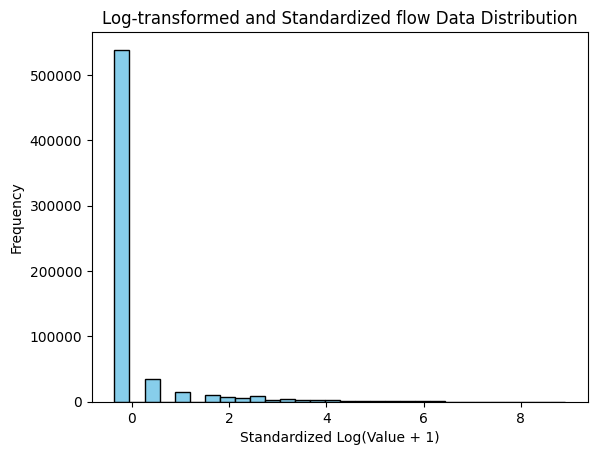

In [36]:
data = merged_df.iloc[:, :-1].to_numpy().flatten()
data = data[~np.isnan(data)]
data_log = np.log1p(data)

# 只对非零值计算均值和标准差
nonzero = data_log[data_log > 0]
mean = np.mean(nonzero)
std = np.std(nonzero)

# 整个序列标准化
data_scaled = (data_log - mean) / std

# 绘制直方图
plt.hist(data_log_scaled, bins=30, color='skyblue', edgecolor='black')
plt.title("Log-transformed and Standardized flow Data Distribution")
plt.xlabel("Standardized Log(Value + 1)")
plt.ylabel("Frequency")
plt.show()

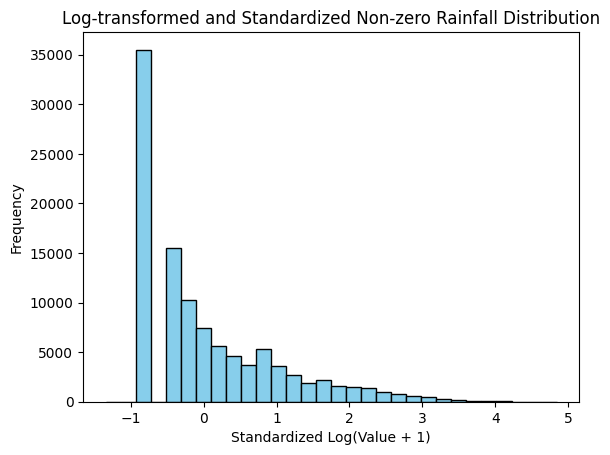

In [38]:
data_log = np.log1p(data)

# 只保留非零值
data_log_nonzero = data_log[data_log > 0]

# 标准化（可以选择只对非零值标准化）
mean = np.mean(data_log_nonzero)
std = np.std(data_log_nonzero)
data_scaled_nonzero = (data_log_nonzero - mean) / std

# 绘制直方图
plt.hist(data_scaled_nonzero, bins=30, color='skyblue', edgecolor='black')
plt.title("Log-transformed and Standardized Non-zero Rainfall Distribution")
plt.xlabel("Standardized Log(Value + 1)")
plt.ylabel("Frequency")
plt.show()